In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [91]:
dataset = pd.read_csv("processed.cleveland.data.csv")
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(axis = 1 ,inplace=True)
dataset

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1


In [92]:
datatype = dataset.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())
newdata = []
for data in datatype:
    newdata.append(datatype[1])
datatype = newdata
le = LabelEncoder()
for i in range(len(datatype)):
    if datatype[i] == False:
        dataset.iloc[:,i] = le.fit_transform(dataset.iloc[:,i])  

In [93]:
xtrain, xtest , ytrain, ytest = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:,dataset.shape[1]-1], test_size=0.2, train_size=0.8, random_state=0)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [94]:
svcmodel = SVC(kernel='rbf', degree=5, C=1.0, gamma='auto', cache_size=12000)
svcmodel.fit(xtrain, ytrain)

SVC(cache_size=12000, degree=5, gamma='auto')

In [95]:
ypred = svcmodel.predict(xtest)

In [96]:
ypred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 4, 1, 0, 1,
       0, 3, 0, 1, 3, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
ytest.values.reshape(1,-1)  

array([[0, 4, 2, 0, 0, 2, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 3, 1, 3, 3, 3,
        0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 2, 0, 0, 0, 0, 1, 3, 2, 0, 0,
        0, 4, 0, 2, 1, 2, 0, 0, 3, 2, 0, 3, 0, 0, 0, 3, 0]])

In [98]:
cm = confusion_matrix(ytest, ypred)
accuracy = accuracy_score(ytest, ypred)

In [99]:
print(cm)

[[30  2  1  0  0]
 [ 5  0  2  1  0]
 [ 3  4  0  1  0]
 [ 6  1  1  0  1]
 [ 0  1  1  1  0]]


In [100]:
print(accuracy*100, "%")

49.18032786885246 %


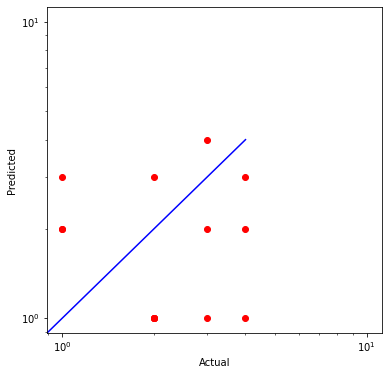

In [103]:
plt.figure(figsize=(6,6))
plt.scatter(ytest, ypred, color='green')
plt.xscale('log')
plt.yscale('log')
p1 = max(max(ypred), max(ytest))
p2 = min(min(ypred), min(ytest))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
plt.savefig('svm.png')